# Assessing the Effect of Makam on Metrical Strength in Turkish Makam Music 
## Dougal Shakespeare, Francessca Ronchini

**Jobs still to do**:
* Decide on how to correlate histograms **DONE**
* Replicate metrical strength for usuls **DONE APART FROM 1**
* Collect Data-sets together **DONE**
* Normalise counts on histogram - **DONE**

* decide what to do with score with different key sgnature compared to the ones we have considered - to add them to the makam we are considering now 
* Correlate the correlatio with the makam as well 

In [1]:
from music21 import *
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [2]:
# TODO: change paths to your own dirs
user = 'd'
if user == 'd':
    xml_path = '/media/dshakes/Elements/Turkish-makam/SymbTr-2.4.3/MusicXML/'
    pdf_path = '/media/dshakes/Elements/Turkish-makam/SymbTr-2.4.3/SymbTr-pdf/'
    musescore_path = '/home/dshakes/Desktop/MuseScore-3.4.2-x86_64.AppImage'
else:
    xml_path = '/Users/francescaronchini/repo/makam_project/makam/MusicXML_research/'
    pdf_path = '/Users/francescaronchini/repo/makam_project/makam/SymbTr-pdf/'

In [3]:
# Config Muse Score
if user == 'd':
    us = environment.UserSettings()
    us.create()
    us['musicxmlPath'] = musescore_path # Path to MuseScore3.exe
    us['ipythonShowFormat'] = 'musicxml'

UserSettingsException: An environment configuration file already exists; simply set values to modify.

## Pre-processing and Balancing of Data

In [4]:
#getting all the list of the different makam and usul used for each pdf file
usul = []
makam = []
for makam_file in os.listdir(pdf_path):
    if makam_file[-3:] == 'pdf':
        usul.append(makam_file.split('--')[2])
        makam.append(makam_file.split('--')[0])

In [5]:
#value count of different usul
pd.Series(usul).value_counts()

aksak            319
sofyan           293
duyek            278
aksaksemai       128
curcuna          111
                ... 
firengifer         1
darbeyn            1
turkdarbi          1
raksaksagi_ii      1
3334               1
Length: 88, dtype: int64

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    a = pd.Series(usul).value_counts()

In [7]:
# Output makam / ursul distribution for all ursuls which have > 5 occurances in a makam
makams = pd.DataFrame(np.array([usul, makam]).T, columns=['usul', 'makam'])
makamsdf = makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 5)
makamsdf = makamsdf.groupby(['makam', 'usul'])['makam'].count() 

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(makamsdf)

makam            usul       
acemasiran       agiraksak       7
                 aksak           9
                 duyek           7
acemkurdi        aksak           6
beyati           agiraksak       7
                 aksak           7
                 aksaksemai      7
                 duyek          11
buselik          duyek          10
                 sofyan          6
evic             aksak           8
gerdaniye        sofyan          8
hicaz            agiraksak      12
                 aksak          26
                 curcuna         9
                 duyek          19
                 nimsofyan      12
                 semai           8
                 senginsemai     6
                 sofyan         20
                 turkaksagi      8
hicaz_humayun    sofyan          6
hicazkar         aksak          11
                 devrihindi      8
                 duyek          15
                 sofyan          7
huseyni          agiraksak       6
                 aksak    

In [8]:
# aksak                  319 <- weights in paper
# sofyan                 293 <- weights in paper
# duyek                  278 <- weights in paper
# aksaksemai             128 <- need to find these weights

high_pop_usuls = ['aksak', 'sofyan', 'duyek', 'aksaksemai'] #select 4 most popular ursuls for meaningful analysis
filtered_makams = makams.loc[makams['usul'].isin(high_pop_usuls)] #select makams which contain those usul
filtered_makams = filtered_makams.groupby(['makam', 'usul']).filter(lambda x: len(x) > 3) #remove usul occurances with <= 3
df = pd.DataFrame({'count' : filtered_makams.groupby( [ "makam", "usul"] ).size()}).reset_index()

# remove all makams which do not appear in all 4 usuls
vc = df['makam'].value_counts()
vc = vc[vc == 4].index
df = df.loc[df['makam'].isin(vc)]

# output chosen makams and usul counts
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

              makam        usul  count
0        acemasiran       aksak      9
1        acemasiran  aksaksemai      4
2        acemasiran       duyek      7
3        acemasiran      sofyan      5
6            beyati       aksak      7
7            beyati  aksaksemai      7
8            beyati       duyek     11
9            beyati      sofyan      4
27          huseyni       aksak     15
28          huseyni  aksaksemai      5
29          huseyni       duyek      7
30          huseyni      sofyan     17
34         karcigar       aksak      8
35         karcigar  aksaksemai      4
36         karcigar       duyek      8
37         karcigar      sofyan      4
39  kurdilihicazkar       aksak     13
40  kurdilihicazkar  aksaksemai      4
41  kurdilihicazkar       duyek      6
42  kurdilihicazkar      sofyan      5
43            mahur       aksak     18
44            mahur  aksaksemai      5
45            mahur       duyek     16
46            mahur      sofyan     10
74            ussak      

## Hard Coded Usul Weights
All apart from aksaksemai usul weights we consider are already defined in the following paper which we consider as a baseline [1].

Aksaksemai usul

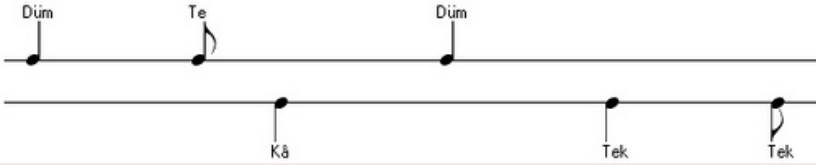

We calculate the weighted metrical distribution for the Aksaksemai usul by considering the weightings defined in the Mus2okr software as considered in the bassline paper.

[1] http://mtg.upf.edu/node/3886

Where are going to considered only makams which shared the same usul

In [9]:
#makams that will be considered for this research
makam_considered = df.makam.unique()
print(makam_considered)

['acemasiran' 'beyati' 'huseyni' 'karcigar' 'kurdilihicazkar' 'mahur'
 'ussak']


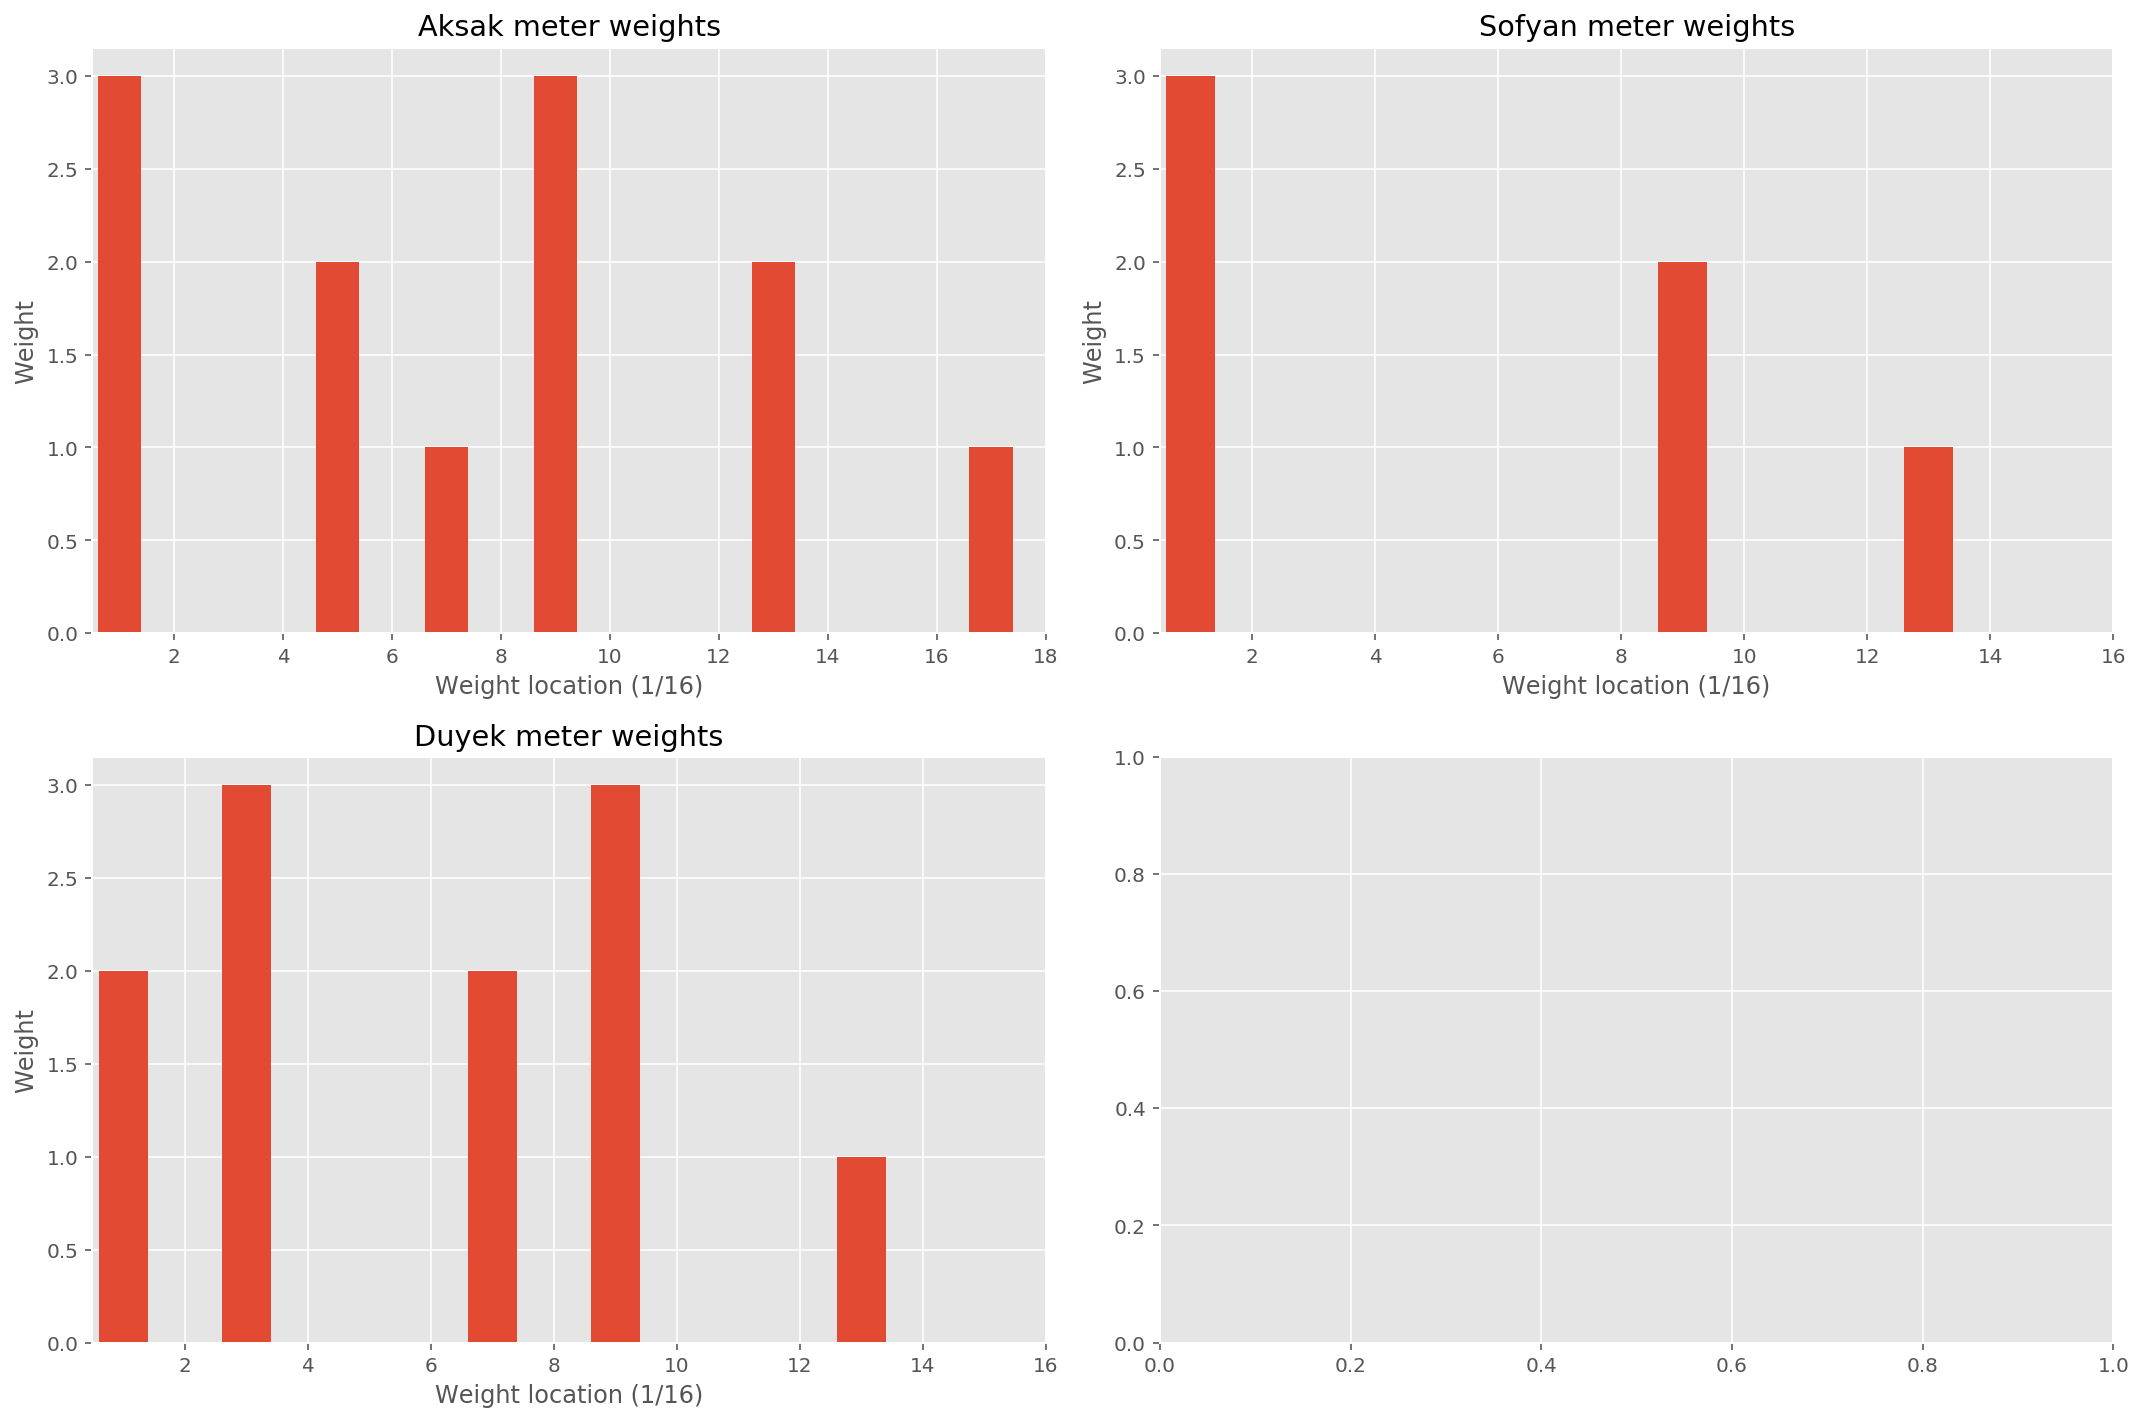

In [10]:
# aksak                  319 <- weights in paper
# sofyan                 293 <- weights in paper
# duyek                  278 <- weights in paper
# aksak_semai             128 <- need to find these weights
# dum, te, ka, tek weights needed to calculate aksaksemai

#weigths_dictionary
weights = {
    "aksak": [3, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0],
    "sofyan": [3,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0], 
    "duyek": [2,0,3,0,0,0,2,0,3,0,0,0,1,0,0,0]
}

#aksak_semai_weights = [] #need to find thre weigths

#tempo is different according to the maka
#todo: some usul, even if the same they have different tempo
#considering the 16 as the smallest note
usul_tempo = {
    "aksak": [9, 8], 
    "sofyan": [4, 4], 
    "duyek": [8, 8] 
}

#creating a dictionary to save bins needed to plot the histogram for every usul
usul_bins = {}
for usul in usul_tempo:
    y_bins = (16/usul_tempo[usul][1]) * usul_tempo[usul][0]
    usul_bins[usul] = int(y_bins)


#todo: dividing the plot function into another cell only for the plotting function
plt.style.use('ggplot')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(10)
fig.set_figwidth(15)


#create plot
# usul aksak
ax1.bar(np.arange(1, usul_bins["aksak"]+1, dtype=int), weights["aksak"])
ax1.set_xlabel("Weight location (1/16)")
ax1.set_xlim(0.5, usul_bins["aksak"])
ax1.set_ylabel("Weight")
ax1.set_title('Aksak meter weights')

#usul sofyan
ax2.bar(np.arange(1, usul_bins["sofyan"]+1, dtype=int), weights["sofyan"])
ax2.set_xlabel("Weight location (1/16)")
ax2.set_xlim(0.5, usul_bins["sofyan"])
ax2.set_ylabel("Weight")
ax2.set_title('Sofyan meter weights')

#usul duyek
ax3.bar(np.arange(1, usul_bins["duyek"]+1, dtype=int), weights["duyek"])
ax3.set_xlabel("Weight location (1/16)")
ax3.set_xlim(0.5, usul_bins["duyek"])
ax3.set_ylabel("Weight")
ax3.set_title('Duyek meter weights')
 
#Create names on the x-axis
#plt.xticks(y_pos, bars)
 
#Show graphic
plt.tight_layout()
plt.show()

## Working with makam scores
Most of makam scores have non standard key signatures, and this might cause problems.

Music21 was not developed with makam music in mind, and many of the accidentals used in makam music are not recognized by music21.

In [11]:
# path to test xml file
#makamScore = '../makam/MusicXML_research/acemasiran--nakis--yuruksemai--ne_hevayi--dede_efendi.xml'
makamScore = xml_path + 'acemasiran--nakis--yuruksemai--ne_hevayi--dede_efendi.xml'

In [13]:
# these are the names of all the accidentals used in makam scores, as contained in the MusicXML files
makamAccidentals = ['double-slash-flat', 'flat', 'slash-flat', 'quarter-flat', 'quarter-sharp', 'sharp', 'slash-quarter-sharp', 'slash-sharp']

# create a stream to contained altered notes
makamNotes = stream.Stream()

for i in range(len(makamAccidentals)): # create a note per accidental
    try:
        n = note.Note()
        n.pitch.accidental = makamAccidentals[i] # add one accidental from the list
        n.addLyric(makamAccidentals[i], applyRaw=True) # add the name of the accidental as lyric
        n.addLyric(n.pitch.accidental.name, applyRaw=True) # add the name used by music21 as lyric
        n.addLyric(n.pitch.accidental.alter) # add the number of semitones of the accidental as lyric
        makamNotes.append(n)
    except:
        print("music21 doesn't accept {} as accidental".format(makamAccidentals[i]))

print('done')
makamNotes.show()

music21 doesn't accept double-slash-flat as accidental
music21 doesn't accept slash-flat as accidental
music21 doesn't accept slash-quarter-sharp as accidental
music21 doesn't accept slash-sharp as accidental
done


Since the problem when loading the score with music21 is the non standard key signature, one solution might be to manipulate the MusicXML file to get rid of the time signature.
<br/>
I use ElementTree to find it.

In [14]:
import xml.etree.ElementTree as ET

tree = ET.parse(makamScore)
root = tree.getroot()   

notes = []
accidentals = []
alter = []

for k in root.iter('key'):
    for ks in k.findall('key-step'):
        notes.append(ks.text)
    for ka in k.findall('key-accidental'):
        accidentals.append(ka.text)
    #need to add this in order to work
    for kalt in k.findall('key-alter'):
        alter.append(kalt.text)

print('The key signature of this score has:')
for i in range(len(notes)):
    print('-', notes[i], accidentals[i])

The key signature of this score has:
- B flat


Now I can remove it from the MusicXML file and create a new file without key signature

In [15]:
for k in root.iter('key'):
    print(k)
    for ks in k.findall('key-step'):
        k.remove(ks)
    for ka in k.findall('key-accidental'):
        k.remove(ka)
    #need to add this in order to work 
    for kalt in k.findall('key-alter'):
        k.remove(kalt)

newMakamScore = makamScore[:-4] + '-withoutKeySignature.xml'
print(newMakamScore)

#todo: is this file taken two times? not on mine, it is being written to a different folder

tree.write(newMakamScore)

<Element 'key' at 0x7f61f304c4f8>
/media/dshakes/Elements/Turkish-makam/SymbTr-2.4.3/MusicXML/acemasiran--nakis--yuruksemai--ne_hevayi--dede_efendi-withoutKeySignature.xml


And now, music21 will load the score

In [15]:
s = converter.parse(newMakamScore)
s.show()

Now that we have seen how it works with one score, we will go loop through all the scores, deleting theone which have different key signature compared to the ones we decided to analyze. For now, we will also skip the usul for which we do not know the weigths yet. This will be included in the future. 

In [30]:
# if the function return 0, the file can be keeped, if the function return 1 the file should be removed (at the moment)
def check_time_signature(usul, new_path):
    #check time siganture
    s = converter.parse(new_path)
    #print(new_path)
    #only scores with only 1 signature
    p = s.parts # taking the first part of the score which should be the one with time signature information
    tS = p.flat.getElementsByClass(meter.TimeSignature).stream()
    #we only want makam with only one time signature so far 
    if len(tS) == 1:
        score_time = [tS[0].numerator, tS[0].denominator]
        #todo: to delere ideally once we know the weights
        if usul != 'aksaksemai':
            if score_time != usul_tempo[usul]:
                #different key signature
                return 1 
            
    else:
        #more than a key siganture in the score
        return 1 
    
    return 0

# we could of course change the function but since we did not decide what to do in case key signatures are different
# I just make the functionm with return so we will be able to decide afterwards what to do. 

In [31]:
if user == 'f':
    makam_out_folder_path = '../makam/MusicXML_noaccidentals/'
else:
    makam_out_folder_path = '/media/dshakes/Elements/Turkish-makam/MusicXML_noaccidentals/'

if not os.path.exists(makam_out_folder_path):
    os.makedirs(makam_out_folder_path)

def remove_accidentals(makam_score):
    
    tree = ET.parse(makam_score)
    root = tree.getroot() 
    
    for k in root.iter('key'):
        print(k)
    for ks in k.findall('key-step'):
        k.remove(ks)
    for ka in k.findall('key-accidental'):
        k.remove(ka)
    #need to add this in order to work 
    for kalt in k.findall('key-alter'):
        k.remove(kalt)
        
    # NEW - added in as file paths were different 
    makam_score = makam_score.split('/')[-1]
    
    # NEW - fixed double .xml in file_path
    new_Makam_Score = makam_out_folder_path + makam_score[:-4] + '-withoutKeySignature.xml'
    tree.write(new_Makam_Score)
     
    return new_Makam_Score

In [32]:
'''
Loop for processing all the files inside a folder. 
We first need to het right of the accidentals in the score in order to read it and check the time signature
'''
#makam_considered for the makam to consider
#usul_tempo for the usul tempo considered 
usul_considered = high_pop_usuls
#makam_init_folder_path = '../makam/MusicXML_research/'
makam_init_folder_path = xml_path

makam_count_before = 0
makam_count_noaccidentals = 0
makam_count_different_time = 0 
counter = 0

for makam_file in os.listdir(makam_init_folder_path):
    #for mac and .DS_store file
    if not makam_file.startswith('.'):
        usul = makam_file.split('--')[2]
        makam = makam_file.split('--')[0]
        counter = counter + 1
        
        # if the score has the file and makams we will consider...
        if usul in usul_considered and makam in makam_considered:  
            makam_count_before = makam_count_before + 1
            #remove accidentals
            path_score = makam_init_folder_path + makam_file
            new_path = remove_accidentals(path_score)
            
            #check time signature for the current xml
            different_time = check_time_signature(usul, new_path)
            if different_time:
                print("The file {} will be removed for different time signature".format(new_path))
                os.remove(new_path)
                makam_count_different_time = makam_count_different_time + 1 
                

<Element 'key' at 0x7f61f21135e8>
<Element 'key' at 0x7f61f09288b8>
<Element 'key' at 0x7f61f0406908>
<Element 'key' at 0x7f61f064ce58>
<Element 'key' at 0x7f61f2057958>
<Element 'key' at 0x7f61f032d728>
<Element 'key' at 0x7f61f06a5d18>
<Element 'key' at 0x7f61f02d6cc8>
<Element 'key' at 0x7f61f1e7d5e8>
<Element 'key' at 0x7f61f0643048>
<Element 'key' at 0x7f61f08ca318>
<Element 'key' at 0x7f61f02b1cc8>
<Element 'key' at 0x7f61f0765908>
<Element 'key' at 0x7f61f1f01958>
<Element 'key' at 0x7f61f03b41d8>
<Element 'key' at 0x7f61f211bc28>
<Element 'key' at 0x7f61f1f38638>
<Element 'key' at 0x7f61f05c2b88>
<Element 'key' at 0x7f61f1d94138>
<Element 'key' at 0x7f61f064c908>
<Element 'key' at 0x7f61f09406d8>
The file /media/dshakes/Elements/Turkish-makam/MusicXML_noaccidentals/acemasiran--sazsemaisi--aksaksemai----gazi_giray_han-withoutKeySignature.xml will be removed for different time signature
<Element 'key' at 0x7f61f001e548>
The file /media/dshakes/Elements/Turkish-makam/MusicXML_noac

<Element 'key' at 0x7f61f05214a8>
<Element 'key' at 0x7f61f1f0de58>
<Element 'key' at 0x7f61f063eb88>
<Element 'key' at 0x7f61f072d4f8>
<Element 'key' at 0x7f61f0975138>
<Element 'key' at 0x7f61f0348548>
<Element 'key' at 0x7f61f1e54958>
<Element 'key' at 0x7f61f08558b8>
The file /media/dshakes/Elements/Turkish-makam/MusicXML_noaccidentals/kurdilihicazkar--sarki--aksak--her_gece--bimen_sen-withoutKeySignature.xml will be removed for different time signature
<Element 'key' at 0x7f61f1e4f3b8>
<Element 'key' at 0x7f61f0218728>
<Element 'key' at 0x7f61f08dc458>
<Element 'key' at 0x7f61f070c4f8>
<Element 'key' at 0x7f61f210e958>
<Element 'key' at 0x7f61f0221a48>
<Element 'key' at 0x7f61f026de58>
<Element 'key' at 0x7f61f03b0a48>
<Element 'key' at 0x7f61f02fc138>
<Element 'key' at 0x7f61f1dbdcc8>
<Element 'key' at 0x7f61f05349a8>
<Element 'key' at 0x7f61f05ebb38>
<Element 'key' at 0x7f61f20bd408>
<Element 'key' at 0x7f61f023bdb8>
<Element 'key' at 0x7f61f0919868>
The file /media/dshakes/Elem

In [33]:
print("We analysized {} makams but we kept only {} for time siganture".format(makam_count_before, (makam_count_before-makam_count_different_time)))

We analysized 256 makams but we kept only 218 for time siganture


In [34]:
print("Totale number of makams {}".format(counter))

Totale number of makams 2202


## Scale the offsets to K

In [35]:
def scale_to_k(OldMin, OldMax, OldValue, k):
    NewMin = 0
    NewMax = k 
    
    NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    return NewValue

In [36]:
# function to calc measure seperation discarding measures which are glissandos
def calc_measure_length(m1, m2, measures):
    if isinstance(measures[m1], m21.spanner.Glissando):
        # shift m1 and m2
        m1+=1
        m2+=1
        return calc_measure_length(m1,m2,measures)
    if isinstance(measures[m2], m21.spanner.Glissando):
        m2+=1
        return calc_measure_length(m1,m2,measures)
    else: return measures[m2].offset - measures[m1].offset

## Create Histograms to Analyse Note Dist.

In [37]:
import music21 as m21

df_makam_bin_vals = pd.DataFrame(columns=['usul', 'makam', 'bin_vals', 'file_path'])

def analyse_note_dist(k, makam, usul, scoreParts, makam_score):
    
    note_offsets = np.array([])
    meter_bins = np.zeros(k)
    measures0 = scoreParts[0].elements[1:]

    beats_in_bar = calc_measure_length(1,2,measures0)
    
    #print('seperation between measures:', beats_in_bar)

    for m in measures0:
    
        #print('------------------------------------------------')
        #print('Measure number:', m.number, '\tMeasure offset:', m.offset)

        # hack to avoid processing of glissandos
        if isinstance(m, m21.spanner.Glissando) == False:
            
            for n1 in m.elements: 
                # only consider notes, not rests, time sigs ect.
                if isinstance(n1, m21.note.Note):
                    note_offset = n1.offset
                    note_offsets = np.append(note_offsets, note_offset)
                    scaled_offset = scale_to_k(0, beats_in_bar, note_offset, k)
                    bin_val = math.floor(scaled_offset)
                    meter_bins[bin_val] += 1
        else: 
            print(makam_score)
            print('glissando found:', m)
    
    # add row to df
    df_makam_bin_vals.loc[len(df_makam_bin_vals)] = [usul, makam, meter_bins, makam_score]

In [38]:
counter = 0

for makam_score in os.listdir(makam_out_folder_path):
    usul = makam_score.split('--')[2]
    makam = makam_score.split('--')[0]
    
    # work-around until we get weights for this usul
    if usul != 'aksaksemai':
        k = usul_bins[usul] #value to scale to
        makam_path = makam_out_folder_path + makam_score
        counter = counter + 1 
        
        s = converter.parse(makam_path)
        scoreParts = s.parts.stream()
        
        print('usul -', usul)
        print('makam -', makam)
        print('scale to k =', k)
        
        analyse_note_dist(k, makam, usul, scoreParts, makam_score)

usul - aksak
makam - acemasiran
scale to k = 18
usul - sofyan
makam - acemasiran
scale to k = 16
usul - duyek
makam - acemasiran
scale to k = 16
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - aksak
makam - acemasiran
scale to k = 18
usul - duyek
makam - acemasiran
scale to k = 16
usul - duyek
makam - acemasiran
scale to k = 16
usul - duyek
makam - acemasiran
scale to k = 16
usul - duyek
makam - acemasiran
scale to k = 16
usul - duyek
makam - acemasiran
scale to k = 16
usul - sofyan
makam - acemasiran
scale to k = 16
usul - sofyan
makam - acemasiran
scale to k = 16
usul - sofyan
makam - acemasiran
scale to k = 16
usul - sofyan
makam - acemasiran
scale to k = 16
usul - duyek
makam - beyati
scale to k = 16
usul - sofyan
makam - beyati
scale to k

usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - aksak
makam - mahur
scale to k = 18
usul - duyek
makam - mahur
scale to k = 16
usul - duyek
makam - mahur
scale to k = 16
usul - duyek
makam - mahur
scale to k = 16
mahur--sarki--duyek--ben_guzele--sadettin_kaynak-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note C><music21.note.Note E>>
mahur--sarki--duyek--ben_guzele--sadettin_kaynak-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <music21.note.Note C><music21.note.Note E>>
mahur--sarki--duyek--ben_guzele--sadettin_kaynak-withoutKeySignature.xml
glissando found: <music21.spanner.Glissando <m

usul - duyek
makam - ussak
scale to k = 16
usul - sofyan
makam - ussak
scale to k = 16
usul - sofyan
makam - ussak
scale to k = 16
usul - sofyan
makam - ussak
scale to k = 16
usul - sofyan
makam - ussak
scale to k = 16
usul - sofyan
makam - ussak
scale to k = 16


In [39]:
print('File that have been normalize: {}'.format(counter)) 

File that have been normalize: 212


In [40]:
df_makam_bin_vals

,usul,makam,bin_vals,file_path
0,aksak,acemasiran,"[8.0, 0.0, 8.0, 0.0, 8.0, 0.0, 8.0, 0.0, 8.0, ...",acemasiran--aranagme--aksak--1---withoutKeySig...
1,sofyan,acemasiran,"[12.0, 4.0, 4.0, 0.0, 8.0, 0.0, 8.0, 4.0, 14.0...",acemasiran--aranagme--sofyan--1---withoutKeySi...
2,duyek,acemasiran,"[27.0, 1.0, 16.0, 14.0, 27.0, 2.0, 30.0, 2.0, ...",acemasiran--pesrev--duyek--son_pesrev--huseyin...
3,aksak,acemasiran,"[48.0, 2.0, 38.0, 2.0, 42.0, 4.0, 42.0, 2.0, 4...",acemasiran--sarki--aksak--acildi_nevbahar--sad...
4,aksak,acemasiran,"[37.0, 2.0, 14.0, 16.0, 34.0, 8.0, 34.0, 24.0,...",acemasiran--sarki--aksak--dinle_sozum--iii_sel...
...,...,...,...,...
207,sofyan,ussak,"[18.0, 12.0, 30.0, 24.0, 24.0, 27.0, 9.0, 3.0,...",ussak--turku--sofyan--eledim_eledim--erzurum-w...
208,sofyan,ussak,"[48.0, 20.0, 44.0, 24.0, 48.0, 12.0, 36.0, 24....",ussak--turku--sofyan--kalenin_burcu_muyam---wi...
209,sofyan,ussak,"[32.0, 40.0, 10.0, 14.0, 40.0, 28.0, 22.0, 8.0...",ussak--turku--sofyan--mevlam_bircok--malatya-w...
210,sofyan,ussak,"[20.0, 2.0, 19.0, 21.0, 21.0, 14.0, 21.0, 0.0,...",ussak--turku--sofyan--sigaramin_dumani---witho...


In [41]:
def scale_to_3(x):
    NewMin = 0
    NewMax = 3
    OldMin = x.min()
    OldMax = x.max()
    
    x = (((x - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
    #print(x)
    return x

In [42]:
# normalise bin_vals to be 0 - 3
df_makam_bin_vals['bin_vals'] = df_makam_bin_vals['bin_vals'].apply(scale_to_3)

In [43]:
df_makam_bin_vals

,usul,makam,bin_vals,file_path
0,aksak,acemasiran,"[3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, ...",acemasiran--aranagme--aksak--1---withoutKeySig...
1,sofyan,acemasiran,"[2.5714285714285716, 0.8571428571428571, 0.857...",acemasiran--aranagme--sofyan--1---withoutKeySi...
2,duyek,acemasiran,"[2.5161290322580645, 0.0, 1.4516129032258065, ...",acemasiran--pesrev--duyek--son_pesrev--huseyin...
3,aksak,acemasiran,"[3.0, 0.125, 2.375, 0.125, 2.625, 0.25, 2.625,...",acemasiran--sarki--aksak--acildi_nevbahar--sad...
4,aksak,acemasiran,"[2.763157894736842, 0.0, 0.9473684210526315, 1...",acemasiran--sarki--aksak--dinle_sozum--iii_sel...
...,...,...,...,...
207,sofyan,ussak,"[1.5, 1.0, 2.5, 2.0, 2.0, 2.25, 0.75, 0.25, 3....",ussak--turku--sofyan--eledim_eledim--erzurum-w...
208,sofyan,ussak,"[3.0, 1.25, 2.75, 1.5, 3.0, 0.75, 2.25, 1.5, 3...",ussak--turku--sofyan--kalenin_burcu_muyam---wi...
209,sofyan,ussak,"[1.875, 2.375, 0.5, 0.75, 2.375, 1.625, 1.25, ...",ussak--turku--sofyan--mevlam_bircok--malatya-w...
210,sofyan,ussak,"[2.3076923076923075, 0.23076923076923078, 2.19...",ussak--turku--sofyan--sigaramin_dumani---witho...


In [71]:
#plot folder
plot_folder_path = './plots'

if not os.path.exists(plot_folder_path):
    os.makedirs(plot_folder_path)

def plot_hist(x, makam, usul, i, file_path):
    # PLOT        
    plt.style.use('ggplot')
    
    fig = plt.figure()
    bars = np.arange(1, len(x) + 1)
    y_pos = np.arange(len(bars))
 
    # Create bars
    plt.bar(y_pos, x)
    plt.xlabel("Location (1/16)")
    plt.ylabel("Normalized count")
    plt.title('Metrical strength for {}'.format(file_path))
 
    # Create names on the x-axis
    plt.xticks(y_pos, bars)
    
    #save plot inside the folder
    fig.savefig(plot_folder_path + '/' + file_path + '.png', dpi=200)
    
    #plotting 4 just to give an idea, all the plot are gonna be save into the folder plots inside the current folder
    if i < 4: plt.show()
    
    plt.close()  

acemasiran--aranagme--aksak--1--


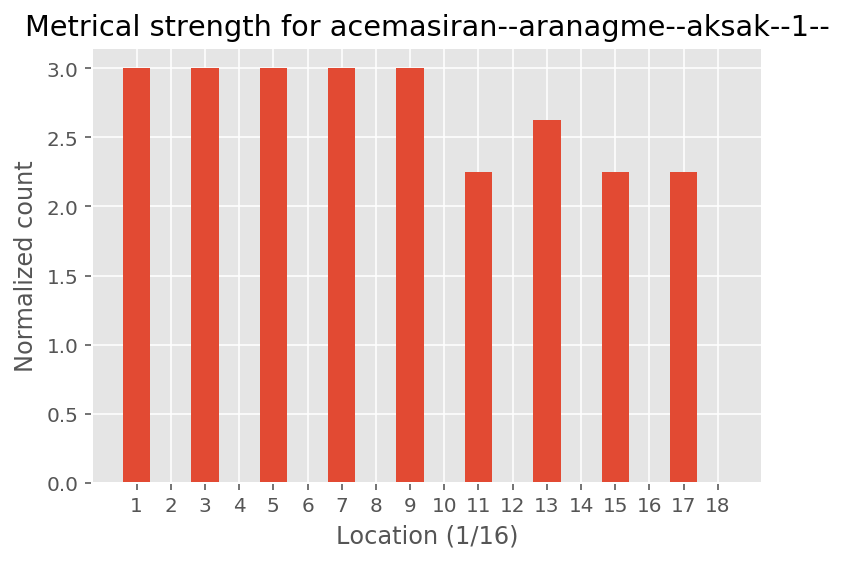

acemasiran--aranagme--sofyan--1--


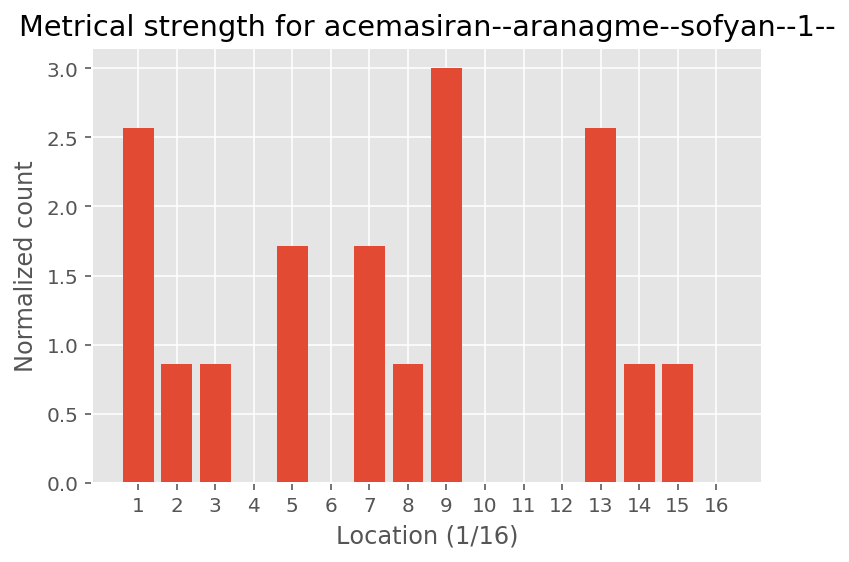

acemasiran--pesrev--duyek--son_pesrev--huseyin_fahreddin_dede


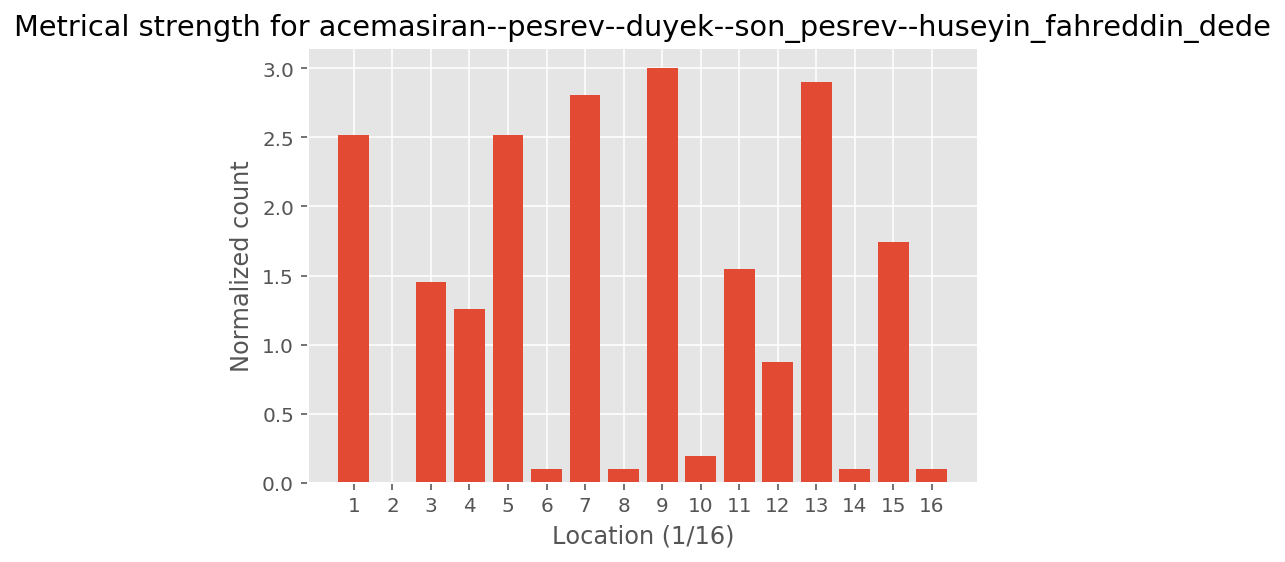

acemasiran--sarki--aksak--acildi_nevbahar--sadullah_aga


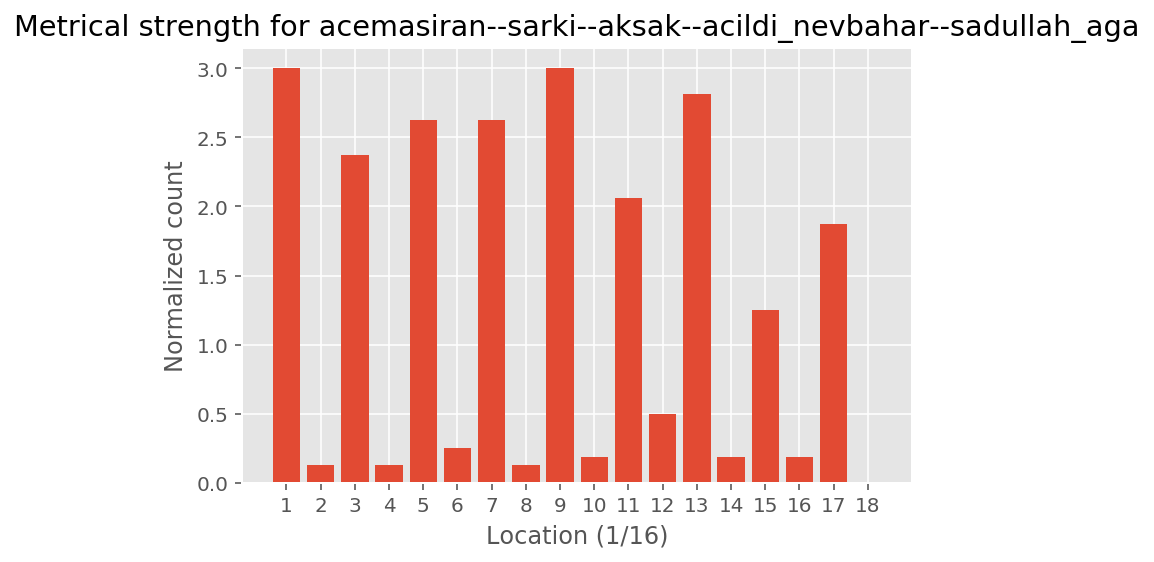

acemasiran--sarki--aksak--dinle_sozum--iii_selim
acemasiran--sarki--aksak--dustum_bir--ali_riza_avni_tinaz
acemasiran--sarki--aksak--gonlum_dusuyor--ismail_baha_surelsan
acemasiran--sarki--aksak--lutfeyle_meded--dede_efendi
acemasiran--sarki--aksak--oldu_gonul--dede_efendi
acemasiran--sarki--aksak--o_tebessum--ismail_baha_surelsan
acemasiran--sarki--duyek--bulutlar_kokunu--sadettin_kaynak
acemasiran--sarki--duyek--bu_hal--sadettin_kaynak
acemasiran--sarki--duyek--gonul_seni--sadettin_kaynak
acemasiran--sarki--duyek--pence-i_gamdan--misirli_udi_ibrahim_efendi
acemasiran--sarki--duyek--ruhumda_derin--kemal_gurses
acemasiran--sarki--sofyan--bakma_sakin--sakir_aga
acemasiran--sarki--sofyan--gonul_sana--sadettin_kaynak
acemasiran--seyir--sofyan--1--erol_bingol
acemasiran--seyir--sofyan--1--sefik_gurmeric
beyati--ilahi--duyek--kapisi_yok--
beyati--kanto--sofyan--karga_da_seni--
beyati--sarki--aksak--benzemez_kimse--fehmi_tokay
beyati--sarki--aksak--gonlum_geri--kasim_inaltekin
beyati--sarki-

ussak--ilahi--duyek--allah_emrin--zekai_dede
ussak--ilahi--duyek--dostun_senden--ali_rifat_cagatay
ussak--ilahi--sofyan--askinla_cak--haci_nafiz_bey
ussak--ilahi--sofyan--ey_enbiyalar--
ussak--ilahi--sofyan--ey_sehinsah-i--tiznam_yusuf_celebi
ussak--ilahi--sofyan--hak_taala--ali_ufki
ussak--ilahi--sofyan--seyyah_olup--
ussak--kanto--sofyan--telgirafin_tellerine--
ussak--kurthavasi--sofyan--karsida_kurt--
ussak--ornek_oz--sofyan--1--huseyin_sadettin_arel
ussak--oyunhavasi--aksak--bandirma_dortlemesi--
ussak--popsarkisi--sofyan--ellerimde_buyuttugum--baris_manco
ussak--sarki--aksak--aglatirlar_guldururler--dede_efendi
ussak--sarki--aksak--aman_felek--dede_efendi
ussak--sarki--aksak--bag-i_husnun--kemal_emin_bara
ussak--sarki--aksak--bir_melek--haci_arif_bey
ussak--sarki--aksak--bu_aksam--tatyos_efendi
ussak--sarki--aksak--daglar_dayanmaz--sevki_bey
ussak--sarki--aksak--ducar-i_hicr-i--sevki_bey
ussak--sarki--aksak--gulzara_nazar--sevki_bey
ussak--sarki--aksak--muntazirdir_sana--dellalzad

In [62]:
# plot first value in dataframe as a test
import scipy.stats as sc

#correlations dictionary 
correlation = {
    "aksak": [0, 0, 0], 
    "sofyan": [0, 0, 0], 
    "duyek": [0, 0, 0] 
}

# first key = makam, second key = usul
correlation_makam = {
    "acemasiran": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]}, 
    "beyati": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]},
    "huseyni": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]},
    "karcigar": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]},
    "kurdilihicazkar": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]}, 
    "mahur": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]}, 
    "ussak": {"aksak": [0, 0, 0], "sofyan": [0, 0, 0], "duyek": [0, 0, 0]}
}


#it think it is useful to save the plots in a folder 
for i in df_makam_bin_vals.index:
    sample = df_makam_bin_vals.loc[i]
    usul = sample['usul']
    makam = sample['makam']
    x = sample['bin_vals']
    file_path = sample['file_path'].split('-withoutKeySignature.xml')[0]
    print(file_path)
    
    plot_hist(x, makam, usul, i, file_path) 
    correlation[usul][0] = int(correlation[usul][0]) + 1
    correlation[usul][1] = correlation[usul][1] + sc.spearmanr(x, weights[usul])[0]
    correlation[usul][2] = correlation[usul][2] + sc.spearmanr(x, weights[usul])[1]
    
    correlation_makam[makam][usul][0] += 1
    correlation_makam[makam][usul][1] += sc.spearmanr(x, weights[usul])[0]
    correlation_makam[makam][usul][2] += sc.spearmanr(x, weights[usul])[1]
    
    #i think spearmanr is better the pearsonr cause the pearsonr correlation is considerin the value as continues 
    #and i am wrong thinking that our values are not continuos?
    #cor_coef = sc.pearsonr(x, duyek_weights)
    #sc.spearmanr(x, weights[usul])[0]
        
print("Total number of makam processed: {}".format(i))

In [63]:
# Create DataFrame 
correlation_df = pd.DataFrame(correlation, index =['Total makam', 'correlation', 'p-value']) 
  
# Print the output
correlation_df.iloc[0].apply(int)
correlation_df

,aksak,sofyan,duyek
Total makam,85.000000,63.000000,64.000000
correlation,63.658516,34.088890,44.799323
p-value,0.698917,5.292657,0.801937


In [56]:

correlation_makam_avg = {
    "acemasiran": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]}, 
    "beyati": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]},
    "huseyni": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]},
    "karcigar": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]},
    "kurdilihicazkar": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]}, 
    "mahur": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]}, 
    "ussak": {"aksak": [0, 0], "sofyan": [0, 0], "duyek": [0, 0]}
}


total = 0
for makam, value in correlation_makam.items():
    for usul, value1 in value.items():
        avg_correlation = value1[1]/value1[0]
        avg_pval = value1[2]/value1[0]
        # update our dict
        correlation_makam_avg[makam][usul][0] = avg_correlation
        correlation_makam_avg[makam][usul][1] = avg_pval
        total += value1[0]

# assert we have considered all makams 
print("Total number of makam processed: {}".format(total))  

Total number of makam processed: 212


In [67]:
# Create DataFrame 
correlation_df_makams = pd.DataFrame(correlation_makam_avg) 
for makam in makam_considered:
    print('Makam:', makam)
    total_correlation = 0
    total_pval = 0
    usul_count = 0
    for usul in usul_considered[:3]:
        correlation_val = correlation_df_makams[makam][usul][0]
        p_val = correlation_df_makams[makam][usul][1]
        total_correlation += correlation_val
        total_pval += p_val
        usul_count += 1   
        # output stats
        print("Correlation for {} usul: {}, p-value: {}".format(usul, correlation_val, p_val))
    print('Average correlation for {} makam: {}, p-value: {}\n'.format(makam, total_correlation/usul_count, 
                                                                         total_pval/usul_count))

Makam: acemasiran
Correlation for aksak usul: 0.7940256465591281, p-value: 0.00011402050238690518
Correlation for sofyan usul: 0.6283421510598604, p-value: 0.014793600104939556
Correlation for duyek usul: 0.7179796489455069, p-value: 0.010138951002536572
Average correlation for acemasiran makam: 0.7134491488548318, p-value: 0.008348857203287678

Makam: beyati
Correlation for aksak usul: 0.6859666369713594, p-value: 0.0075081252527291085
Correlation for sofyan usul: 0.563266351872814, p-value: 0.025386088363583647
Correlation for duyek usul: 0.6666502187833672, p-value: 0.007966575056244797
Average correlation for beyati makam: 0.6386277358758469, p-value: 0.013620262890852518

Makam: huseyni
Correlation for aksak usul: 0.781527137349743, p-value: 0.008631947578610358
Correlation for sofyan usul: 0.5130985017395008, p-value: 0.12628736193078147
Correlation for duyek usul: 0.7299750569845117, p-value: 0.026861928334832502
Average correlation for huseyni makam: 0.6748668986912518, p-value

In [68]:
#average correlations per aksak
print("Correlation for aksak usul: {}, p-value: {}".format(correlation["aksak"][1]/correlation["aksak"][0], 
      correlation["aksak"][2]/correlation["aksak"][0]))

Correlation for aksak usul: 0.7489237131946549, p-value: 0.008222549119855548


In [69]:
#average correlations por 
print("Correlation for sofyan usul: {}, p-value: {}".format(correlation["sofyan"][1]/correlation["sofyan"][0], 
      correlation["sofyan"][2]/correlation["sofyan"][0]))

Correlation for sofyan usul: 0.5410934942370229, p-value: 0.08401042875850295


In [70]:
#average correlations por 
print("Correlation for duyek usul: {}, p-value: {}".format(correlation["duyek"][1]/correlation["duyek"][0], 
      correlation["duyek"][2]/correlation["duyek"][0]))

Correlation for duyek usul: 0.699989429056302, p-value: 0.012530263848993308
